## Observations and Insights 

#### Tumor size by weight of mouse
There is a very strong positive correlation between the tumor volume and the weight of the mouse in those mice treated with Capomulin. Further investigation would be required to determine if higher weight actually causes the tumors to grow bigger, or if these two things are just coincidental. 

#### Drug regimens affect on tumor size
Capomulin and Ramicane both have much smaller ranges of tumor volume compared to the other treatments. They stand out as having the lowest median and mean tumor volume as well as the lowest standard deviation and SEM. This indicates the drugs' success at keeping the tumors from growing.

#### Drugs that performed worse than placebo
Ketapril, Naftisol, and Stelasyn all had greater median tumor sizes than the placebo group. Ketapril and Naftisol had the largest variance of any of the regimens as well. This suggests these three drug regimens are not effective at reducing tumor size.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Clean the data

In [3]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[["Mouse ID","Timepoint"]].value_counts()
duplicate_mice.sort_values(ascending = False).head(15)
# mouse "g989" is the only mouse with duplicate timepoints

Mouse ID  Timepoint
g989      20           2
          10           2
          5            2
          0            2
          15           2
a203      45           1
a411      0            1
a251      15           1
          10           1
          5            1
          0            1
a203      35           1
          40           1
a251      30           1
a203      30           1
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study.loc[mouse_study["Mouse ID"]!="g989",:]
mouse_study_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

Summary statistics generated with groupby and summary statistical methods

In [8]:
# For each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen = mouse_study_cleaned[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen")
mean = regimen.mean()
median = regimen.median()
variance = regimen.var()
std = regimen.std()
sem = regimen.sem()

In [9]:
# Assemble the resulting series into a single summary dataframe.
regimen_stats = pd.merge(mean,median, on = "Drug Regimen")
regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume (mm3)","Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})
regimen_stats2 = pd.merge(variance,std, on="Drug Regimen")
regimen_stats2 = regimen_stats2.rename(columns={"Tumor Volume (mm3)_x":"Variance","Tumor Volume (mm3)_y":"Standard Deviation"})
regimen_stats = pd.merge(regimen_stats,regimen_stats2, on = "Drug Regimen")
regimen_stats = pd.merge(regimen_stats,sem, on = "Drug Regimen")
regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)":"SEM"})
regimen_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Summary statistics generated using the aggregation method, in one line of code

In [10]:
# For the second table, use the agg method to produce the same summary statistics table by using a single line of code. 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_study_cleaned[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").aggregate(["mean","median","var","std","sem"],axis="columns")


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

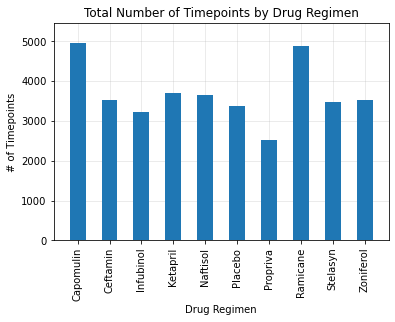

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = mouse_study_cleaned[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen")
total_timepoints = total_timepoint.sum()
total_timepoints.plot(kind="bar", title = "Total Number of Timepoints by Drug Regimen",
                     ylabel="# of Timepoints", legend=False, sort_columns=True,zorder=10)
plt.grid(alpha=0.3,zorder=0)
plt.xlim(-.75,len(total_timepoint["Drug Regimen"].unique())-.25)
plt.ylim(0,total_timepoints["Timepoint"].max()+500)
plt.show()

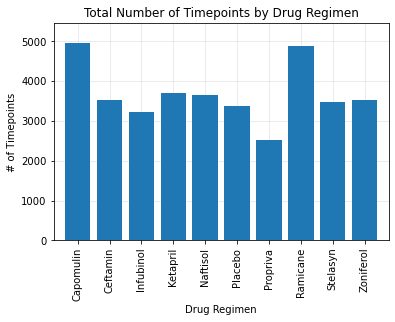

<Figure size 144x216 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
labels = total_timepoints.index
x_axis = np.arange(len(labels))
y_axis = total_timepoints["Timepoint"]

plt.bar(x_axis,y_axis,zorder=10)

plt.title('Total Number of Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')

plt.xticks(x_axis, labels,rotation="vertical")
plt.grid(alpha=0.3,zorder=0)

plt.xlim(-.75,len(x_axis)-.25)
plt.ylim(0,total_timepoints["Timepoint"].max()+500)

plt.figure(figsize=(2,3))
plt.tight_layout()
plt.show()


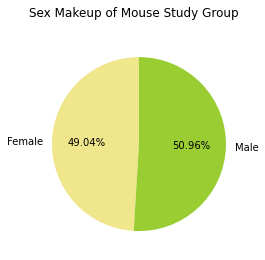

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_study_cleaned[["Sex","Mouse ID"]].groupby("Sex").count()
mouse_sex.plot(kind="pie",subplots=True, startangle=90, autopct='%.2f%%', colors=['khaki','yellowgreen'],
               legend=False, title="Sex Makeup of Mouse Study Group")
plt.ylabel('')
plt.show()

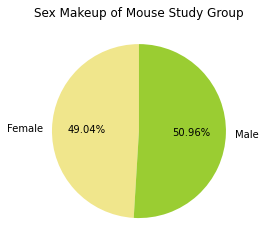

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex.index
count = mouse_sex["Mouse ID"]

plt.pie(count, colors=['khaki','yellowgreen'],labels=labels, autopct="%.2f%%",startangle=90)
plt.title("Sex Makeup of Mouse Study Group")

plt.show()


## Quartiles, Outliers and Boxplots

Calculations of the final tumor volume for each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

In [15]:
mice = mouse_study_cleaned["Mouse ID"].unique()
max_list = []                           
for m in mice:
    max = mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"]==m,["Mouse ID","Tumor Volume (mm3)","Timepoint"]].sort_values("Timepoint", ascending = False)
    max_list.append(max.iloc[0,:])
max_timepoint = pd.DataFrame(max_list)
max_timepoint.head()

,Mouse ID,Tumor Volume (mm3),Timepoint
9,k403,22.050126,45
19,s185,23.343598,45
29,x401,28.484033,45
39,m601,28.430964,45
49,g791,29.128472,45


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, mouse_study_cleaned, on=["Mouse ID","Timepoint"], how = "left")
merged_df.head()

,Mouse ID,Tumor Volume (mm3)_x,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y,Metastatic Sites
0,k403,22.050126,45,Ramicane,Male,21,16,22.050126,1
1,s185,23.343598,45,Capomulin,Female,3,17,23.343598,1
2,x401,28.484033,45,Capomulin,Female,16,15,28.484033,0
3,m601,28.430964,45,Capomulin,Male,22,17,28.430964,1
4,g791,29.128472,45,Ramicane,Male,11,16,29.128472,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

for t in treatments:
    tumor = merged_df.loc[merged_df["Drug Regimen"]==t,["Drug Regimen","Tumor Volume (mm3)_x","Mouse ID"]].set_index("Mouse ID")
    final_tumors = tumor["Tumor Volume (mm3)_x"]
    if t == "Capomulin":
        capomulin = final_tumors
    elif t == "Ramicane":
        ramicane = final_tumors
    elif t == "Infubinol":
        infubinol = final_tumors
    elif t == "Ceftamin":
        ceftamin = final_tumors

### Determine outliers using upper and lower bounds

The only outlier is mouse c326 from the Infubinol trial

**CAPOMULIN**

In [18]:
capomulin_quartiles = capomulin.quantile([0.25,0.5,0.75])

capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_median = capomulin_quartiles[0.5]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
print(f'Lower Q {capomulin_lowerq}')
print(f'Median {capomulin_median}')
print(f'Upper Q {capomulin_upperq}')
print(f'IQR {capomulin_iqr}')

Lower Q 32.37735684
Median 38.1251644
Upper Q 40.1592203
IQR 7.781863460000004


In [19]:
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f'Lower Bound {capomulin_lower_bound}')
print(f'Upper Bound {capomulin_upper_bound}')

Lower Bound 20.70456164999999
Upper Bound 51.83201549


In [20]:
capomulin_outliers = capomulin.loc[capomulin > capomulin_upper_bound] + capomulin.loc[capomulin < capomulin_lower_bound]
print(f'Potential Outliers: {capomulin_outliers}')

Potential Outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


**RAMICANE**

In [21]:
ramicane_quartiles = ramicane.quantile([0.25,0.5,0.75])

ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_median = ramicane_quartiles[0.5]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
print(f'Lower Q {ramicane_lowerq}')
print(f'Median {ramicane_median}')
print(f'Upper Q {ramicane_upperq}')
print(f'IQR {ramicane_iqr}')

Lower Q 31.56046955
Median 36.56165229
Upper Q 40.65900627
IQR 9.098536719999998


In [22]:
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f'Lower Bound {ramicane_lower_bound}')
print(f'Upper Bound {ramicane_upper_bound}')

Lower Bound 17.912664470000003
Upper Bound 54.30681135


In [23]:
ramicane_outliers = ramicane.loc[ramicane > ramicane_upper_bound] + ramicane.loc[ramicane < ramicane_lower_bound]
print(f'Potential Outliers: {ramicane_outliers}')

Potential Outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


**INFUBINOL**

In [24]:
infubinol_quartiles = infubinol.quantile([0.25,0.5,0.75])

infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_median = infubinol_quartiles[0.5]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
print(f'Lower Q {infubinol_lowerq}')
print(f'Median {infubinol_median}')
print(f'Upper Q {infubinol_upperq}')
print(f'IQR {infubinol_iqr}')

Lower Q 54.04860769
Median 60.16518046
Upper Q 65.52574285
IQR 11.477135160000003


In [25]:
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f'Lower Bound {infubinol_lower_bound}')
print(f'Upper Bound {infubinol_upper_bound}')

Lower Bound 36.83290494999999
Upper Bound 82.74144559000001


In [26]:
infubinol_outliers = infubinol.loc[infubinol > infubinol_upper_bound] + infubinol.loc[infubinol < infubinol_lower_bound]
print(f'Potential Outliers: {infubinol_outliers}')

Potential Outliers: Mouse ID
c326   NaN
Name: Tumor Volume (mm3)_x, dtype: float64


**CEFTAMIN**

In [27]:
ceftamin_quartiles = ceftamin.quantile([0.25,0.5,0.75])

ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_median = ceftamin_quartiles[0.5]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
print(f'Lower Q {ceftamin_lowerq}')
print(f'Median {ceftamin_median}')
print(f'Upper Q {ceftamin_upperq}')
print(f'IQR {ceftamin_iqr}')

Lower Q 48.72207785
Median 59.85195552
Upper Q 64.29983003
IQR 15.577752179999997


In [28]:
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f'Lower Bound {ceftamin_lower_bound}')
print(f'Upper Bound {ceftamin_upper_bound}')

Lower Bound 25.355449580000002
Upper Bound 87.66645829999999


In [29]:
ceftamin_outliers = ceftamin.loc[ceftamin > ceftamin_upper_bound] + ceftamin.loc[ceftamin < ceftamin_lower_bound]
print(f'Potential Outliers: {ceftamin_outliers}')

Potential Outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


### Box Plot

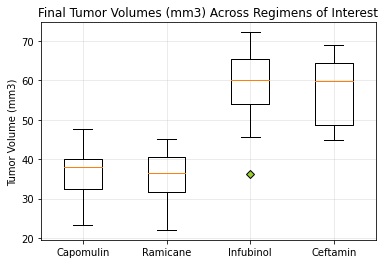

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
data = [capomulin,ramicane,infubinol,ceftamin]
green_diamond = dict(markerfacecolor='yellowgreen', marker='D')
ax1.boxplot(data,flierprops=green_diamond)

ax1.set_title("Final Tumor Volumes (mm3) Across Regimens of Interest")
ax1.set_xticklabels(treatments)
ax1.set_ylabel("Tumor Volume (mm3)")
plt.grid(alpha=0.3,zorder=0)

plt.show()

## Line and Scatter Plots

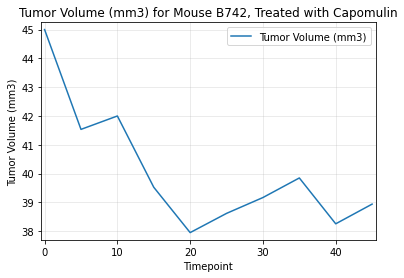

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"]=="Capomulin",:]
mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"]== 'b742',:][["Tumor Volume (mm3)","Timepoint"]]

mouse.plot("Timepoint","Tumor Volume (mm3)",kind="line")
plt.title("Tumor Volume (mm3) for Mouse B742, Treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha=0.3,zorder=0)
plt.xlim(mouse["Timepoint"].min()-0.5, mouse["Timepoint"].max()+0.5)
plt.ylim(mouse["Tumor Volume (mm3)"].min()-0.25,mouse["Tumor Volume (mm3)"].max()+0.25)

plt.show()

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_weight = capomulin_mice[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]].groupby("Mouse ID").mean("Tumor Volume (mm3)")
avg_tumor_weight=avg_tumor_weight.reset_index()


In [33]:
max_weight = avg_tumor_weight["Weight (g)"].max()
min_weight = avg_tumor_weight["Weight (g)"].min()
max_tv = avg_tumor_weight["Tumor Volume (mm3)"].max()
min_tv = avg_tumor_weight["Tumor Volume (mm3)"].min()

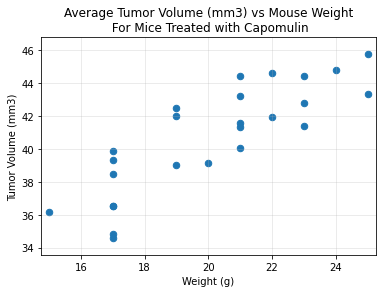

In [34]:
avg_tumor_weight.plot(x="Weight (g)", y="Tumor Volume (mm3)",kind="scatter",s=42)

plt.title("Average Tumor Volume (mm3) vs Mouse Weight\n For Mice Treated with Capomulin")
plt.grid(alpha=0.3,zorder=0)
plt.xlim(min_weight-0.25, max_weight+0.25)
plt.ylim(min_tv-1, max_tv+1)

plt.show()

## Correlation and Regression

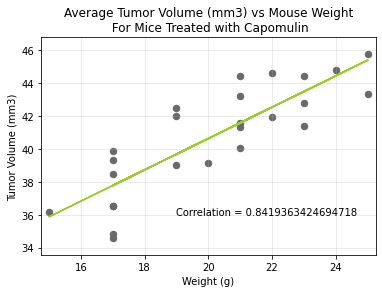

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tumor_weight['Weight (g)']
y_values = avg_tumor_weight['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
correlation_str = correlation[0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,color="yellowgreen",linewidth=1.5)
plt.scatter(x_values, y_values,color="dimgrey",s=42)

plt.title("Average Tumor Volume (mm3) vs Mouse Weight\n For Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha=0.3,zorder=0)
plt.xlim(min_weight-0.25, max_weight+0.25)
plt.ylim(min_tv-1, max_tv+1)

plt.annotate(f'Correlation = {correlation_str}',(19,36))
plt.show()

In [36]:
print(f'Correlation = {correlation_str}')

Correlation = 0.8419363424694718
